Google Drive Authentication

In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
%cd /gdrive/My Drive/DrRabiee-Project/

Mounted at /gdrive
/gdrive/My Drive/DrRabiee-Project


Importing/Installing the Necessary Libraries

In [12]:
!pip install lime

     |████████████████████████████████| 276kB 5.1MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp37-none-any.whl size=283858 sha256=324dc218eac5c4162b85bdcca82096363067da5a67e4b2bc0be86290eff17477
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [13]:
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.datasets import cifar10
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.preprocessing import image
from skimage.segmentation import slic
import pandas as pd
import warnings
from keras.applications.vgg16 import preprocess_input
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
%matplotlib inline

In [4]:
!pip install shap

Loading the CIFAR10 VGG Model

In [5]:
model = load_model('cifar-vgg-model.h5')

Loading the CIFAR10 Data

In [6]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train_float = x_train.astype('float32')
x_test_float = x_test.astype('float32')

170500096/170498071 [==============================] - 2s 0us/step


Normalizing the Data

In [7]:
def normalize(X_train,X_test):
    # this function normalizes inputs so that they have zero mean and unit variance
    # it is used when training a model
    # Input: training set and test set
    # Output: normalized training set and test set according to the trianing set statistics.
    mean = np.mean(X_train,axis=(0,1,2,3))
    std = np.std(X_train, axis=(0, 1, 2, 3))
    X_train = (X_train-mean)/(std+1e-7)
    X_test = (X_test-mean)/(std+1e-7)
    return X_train, X_test

In [8]:
x_train_normalized, x_test_normalized = normalize(x_train_float, x_test_float)

Performing one-hot encoding on the labels

In [9]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

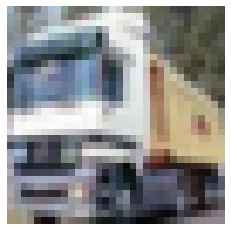

In [10]:
plt.imshow(x_train[1]);
plt.axis('off');

In [11]:
y_train[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

Applying the LIME Method

In [17]:
input_image = x_test[300]

In [15]:
x_test.shape

(10000, 32, 32, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


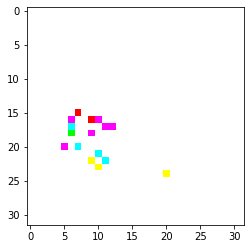

In [19]:
explainer = lime_image.LimeImageExplainer(random_state=42)
explanation = explainer.explain_instance(input_image, model.predict)
plt.imshow(input_image)
temp, mask = explanation.get_image_and_mask(model.predict(input_image.reshape((1,32,32,3))).argmax(axis=1)[0], positive_only=True, hide_rest=True)
plt.imshow(mark_boundaries(temp, mask))